In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
regular_season_results_df = pd.read_csv('data/regular_season_results.csv')
regular_season_results_df

In [ ]:
tourney_seeds_df = pd.read_csv('data/tourney_seeds.csv')
tourney_seeds_df

In [ ]:
tourney_slots_df = pd.read_csv('data/tourney_slots.csv')
tourney_slots_df

In [ ]:
merge_df = regular_season_results_df[['season', 'wteam', 'lteam']]
merge_df = merge_df.merge(tourney_seeds_df, left_on=['season', 'wteam'], right_on=['season', 'team'])
merge_df = merge_df.merge(tourney_seeds_df, left_on=['season', 'lteam'], right_on=['season', 'team'])
merge_df = merge_df[['season', 'wteam', 'seed_x', 'lteam', 'seed_y']]
merge_df = merge_df.rename(columns={'seed_x': 'wseed', 'seed_y': 'lseed'})
merge_df['wseed'] = merge_df['wseed'].str[1:]
merge_df['lseed'] = merge_df['lseed'].str[1:]

In [ ]:
merge_df['vs'] = merge_df['wseed'] + '-' + merge_df['lseed']
merge_df

In [ ]:
higher_seed_won_df: pd.DataFrame = merge_df.loc[
    (merge_df['vs'] == '16-01') | (merge_df['vs'] == '15-02') | (merge_df['vs'] == '14-03') | (
                merge_df['vs'] == '13-04') | (merge_df['vs'] == '12-05') | (merge_df['vs'] == '11-06') | (
                merge_df['vs'] == '10-07') | (merge_df['vs'] == '09-08')
    ][['wseed', 'season']]

higher_seed_won_df

In [ ]:
higher_seed_lost_df = merge_df.loc[
    (merge_df['vs'] == '01-16') | (merge_df['vs'] == '02-15') | (merge_df['vs'] == '03-14') | (
                merge_df['vs'] == '04-13') | (merge_df['vs'] == '05-12') | (merge_df['vs'] == '06-11') | (
                merge_df['vs'] == '07-10') | (merge_df['vs'] == '08-09')
    ][['lseed', 'season']]

higher_seed_lost_df

In [ ]:
won_dict = higher_seed_won_df.groupby('wseed').count().to_dict().pop('season')

In [ ]:
lost_dict = higher_seed_lost_df.groupby('lseed').count().to_dict().pop('season')

In [ ]:
sum_dict = {i: 0 for i in lost_dict}

In [ ]:
for key in sum_dict:
    if key in won_dict:
        sum_dict[key] += won_dict[key]
    else:
        won_dict[key] = 0

    if key in lost_dict:
        sum_dict[key] += lost_dict[key]

In [ ]:
sum_dict

In [ ]:
percentage_dict = {i: won_dict[i] / sum_dict[i] for i in sum_dict}

In [ ]:
percentage_dict

In [ ]:
x_axis = list(reversed(percentage_dict.keys()))
x_axis = [f'{int(i)}-{16 - int(i) + 1}' for i in x_axis]
y_axis = list(reversed(percentage_dict.values()))

In [ ]:
plt.plot(x_axis, y_axis)
plt.xlabel('Seeds playing together')
plt.ylabel('Percentage of the higher seed winning')
plt.show()

START

In [3]:
regular_season_df = pd.read_csv('data/regular_season_detailed_results.csv')
tourney_df = pd.read_csv('data/tourney_detailed_results.csv')

In [4]:
data_df: pd.DataFrame = regular_season_df.loc[
    (regular_season_df['season'] == 2011) | (regular_season_df['season'] == '2012') | (
                regular_season_df['season'] == '2013') | (regular_season_df['season'] == '2014')
    ].reset_index(drop=True)

data_df_df = pd.concat([data_df, tourney_df.loc[
    (tourney_df['season'] == 2011) |\
    (tourney_df['season'] == 2012) |\
    (tourney_df['season'] == 2013)
]])

data_df['count_column'] = 1

In [5]:
data_df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf,count_column
0,2011,7,1228,79,1414,65,H,0,29,58,...,14,22,11,26,12,14,7,1,21,1
1,2011,7,1268,105,1370,76,H,0,35,62,...,17,22,18,16,11,27,18,1,31,1
2,2011,7,1338,83,1348,75,H,0,29,64,...,13,16,10,21,16,17,7,6,25,1
3,2011,7,1400,83,1298,52,H,0,30,59,...,10,18,8,22,8,16,5,5,24,1
4,2011,9,1228,84,1405,45,H,0,37,64,...,10,19,6,17,9,23,6,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,2011,131,1449,77,1112,75,N,1,30,66,...,20,30,11,21,12,8,4,2,15,1
5242,2011,132,1181,75,1314,58,N,0,29,58,...,14,21,19,25,8,16,4,5,16,1
5243,2011,132,1246,70,1196,54,N,0,20,48,...,3,8,15,22,11,14,1,5,22,1
5244,2011,132,1326,71,1336,60,N,0,26,51,...,9,9,10,22,8,10,3,2,17,1


In [6]:
all_teams_df = pd.concat([data_df['wteam'], data_df['lteam']]).drop_duplicates()
all_teams_df = all_teams_df.to_frame().rename(columns={0: 'team'})
all_teams_df = all_teams_df.sort_values(by=['team'])
all_teams_df = all_teams_df.reset_index(drop=True)
all_teams_df

,team
0,1102
1,1103
2,1104
3,1105
4,1106
...,...
340,1460
341,1461
342,1462
343,1463


In [7]:
all_teams_df = (
    all_teams_df
    .merge(data_df[['count_column', 'wteam', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore']], left_on='team', right_on='wteam')[['count_column', 'team', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore']]
    .groupby('team')
    .sum()
    .rename(columns={'count_column': 'win_count'})
    .reset_index()
)
all_teams_df

,team,win_count,wfgm,wfga,wstl,wblk,wscore
0,1102,14,339,673,101,47,994
1,1103,22,561,1237,159,83,1625
2,1104,21,545,1199,214,127,1468
3,1105,10,236,558,82,66,682
4,1106,15,341,775,118,82,1040
...,...,...,...,...,...,...,...
340,1460,17,395,877,105,17,1166
341,1461,8,186,396,77,39,557
342,1462,24,616,1286,130,79,1833
343,1463,14,362,768,62,76,1045


In [8]:
all_teams_df = (
    all_teams_df.copy()
    .merge(data_df[['count_column', 'lteam', 'lfgm', 'lfga', 'lstl', 'lblk', 'lscore']], left_on='team', right_on='lteam')[['count_column', 'team', 'win_count', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore', 'lfgm', 'lfga', 'lstl', 'lblk', 'lscore']]
    .groupby(['team', 'win_count', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore'])
    .sum()
    .rename(columns={'count_column': 'loss_count'})
    .reset_index()
)

all_teams_df

,team,win_count,wfgm,wfga,wstl,wblk,wscore,loss_count,lfgm,lfga,lstl,lblk,lscore
0,1102,14,339,673,101,47,994,14,289,667,73,24,805
1,1103,22,561,1237,159,83,1625,12,275,708,60,33,754
2,1104,21,545,1199,214,127,1468,11,251,590,82,40,665
3,1105,10,236,558,82,66,682,15,318,837,132,66,888
4,1106,15,341,775,118,82,1040,17,328,907,116,64,930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1460,17,395,877,105,17,1166,14,273,682,87,16,822
341,1461,8,186,396,77,39,557,21,468,1146,136,71,1315
342,1462,24,616,1286,130,79,1833,7,147,363,41,17,418
343,1463,14,362,768,62,76,1045,13,263,657,63,46,778


In [9]:
all_teams_df['fgm'] = all_teams_df['wfgm'] + all_teams_df['lfgm']
all_teams_df['fga'] = all_teams_df['wfga'] + all_teams_df['lfga']
all_teams_df['fgp'] = all_teams_df['fgm'] / all_teams_df['fga']
all_teams_df['stl'] = all_teams_df['wstl'] + all_teams_df['lstl']
all_teams_df['blk'] = all_teams_df['wblk'] + all_teams_df['lblk']
all_teams_df['points'] = all_teams_df['wscore'] + all_teams_df['lscore']
all_teams_df['mean_points'] = all_teams_df['points'].mean()

In [10]:
all_teams_df = all_teams_df[['team', 'win_count', 'loss_count', 'stl', 'blk', 'points', 'mean_points', 'fgp']]

In [11]:
opponents_df = pd.concat([
    all_teams_df.merge(data_df, left_on='team', right_on='wteam')[['team', 'lteam']].rename(columns={'lteam': 'opponents'}),
    all_teams_df.merge(data_df, left_on='team', right_on='lteam')[['team', 'wteam']].rename(columns={'wteam': 'opponents'})
]).drop_duplicates().groupby('team').agg(list)
opponents_df

,opponents
team,
1102,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119..."
1103,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133..."
1104,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140..."
1105,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 144..."
1106,"[1244, 1212, 1115, 1108, 1290, 1105, 1380, 134..."
...,...
1460,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122..."
1461,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110..."
1462,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110..."


In [12]:
all_teams_df = all_teams_df.merge(opponents_df, on='team')
all_teams_df

,team,win_count,loss_count,stl,blk,points,mean_points,fgp,opponents
0,1102,14,14,174,71,1799,2080.834783,0.468657,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119..."
1,1103,22,12,219,116,2379,2080.834783,0.429820,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133..."
2,1104,21,11,296,167,2133,2080.834783,0.444941,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140..."
3,1105,10,15,214,132,1570,2080.834783,0.397133,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 144..."
4,1106,15,17,234,146,1970,2080.834783,0.397741,"[1244, 1212, 1115, 1108, 1290, 1105, 1380, 134..."
...,...,...,...,...,...,...,...,...,...
340,1460,17,14,192,33,1988,2080.834783,0.428480,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122..."
341,1461,8,21,213,110,1872,2080.834783,0.424125,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110..."
342,1462,24,7,171,96,2251,2080.834783,0.462705,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110..."
343,1463,14,13,125,122,1823,2080.834783,0.438596,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 116..."


In [13]:
def calculate_opponents_win_percentage(opponents: list[int]) -> float:
    o_df = pd.DataFrame(opponents, columns=['opponent_team'])

    tmp_df = o_df.merge(all_teams_df, left_on='opponent_team', right_on='team')

    total_wins = tmp_df['win_count'].sum()
    total_losses = tmp_df['loss_count'].sum()

    return total_wins / (total_wins + total_losses)

Formula za RPI: https://www.nbastuffer.com/analytics101/relative-percentage-index-rpi/

In [63]:
def calculate_rpi(row: pd.Series) -> pd.Series:
    op = calculate_opponents_win_percentage(row['opponents'])

    o_df = pd.DataFrame(row['opponents'], columns=['opponent_team'])
    tmp_df = o_df.merge(all_teams_df, left_on='opponent_team', right_on='team')

    tmp_list = tmp_df['opponents'].tolist()
    oop_list = []
    for i in tmp_list:
        oop_list += i

    oop = calculate_opponents_win_percentage(oop_list)

    row['rpi'] = round((2 * op + oop) / 3 * 1000)

    return row

In [64]:
def calculate_bpi(row: pd.Series) -> pd.Series:
    win_count = row['win_count']
    loss_count = row['loss_count']
    total_count = win_count + loss_count

    points = row['points']
    mean_points = row['mean_points']

    row['bpi'] = (win_count / total_count) * (points - mean_points) / total_count

    return row

In [65]:
all_teams_df = all_teams_df.apply(calculate_rpi, axis=1)
all_teams_df = all_teams_df.apply(calculate_bpi, axis=1)
all_teams_df

,team,win_count,loss_count,stl,blk,points,mean_points,fgp,opponents,rpi,bpi
0,1102,14,14,174,71,1799,2080.834783,0.468657,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...",527,-5.032764
1,1103,22,12,219,116,2379,2080.834783,0.429820,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...",484,5.674425
2,1104,21,11,296,167,2133,2080.834783,0.444941,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...",513,1.069794
3,1105,10,15,214,132,1570,2080.834783,0.397133,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 144...",459,-8.173357
4,1106,15,17,234,146,1970,2080.834783,0.397741,"[1244, 1212, 1115, 1108, 1290, 1105, 1380, 134...",458,-1.623556
...,...,...,...,...,...,...,...,...,...,...,...
340,1460,17,14,192,33,1988,2080.834783,0.428480,"[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...",512,-1.642239
341,1461,8,21,213,110,1872,2080.834783,0.424125,"[1442, 1232, 1176, 1147, 1244, 1307, 1395, 110...",509,-1.986538
342,1462,24,7,171,96,2251,2080.834783,0.462705,"[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...",550,4.249704
343,1463,14,13,125,122,1823,2080.834783,0.438596,"[1130, 1119, 1216, 1107, 1136, 1221, 1135, 116...",492,-4.951560


In [66]:
data_enriched_df = data_df.merge(all_teams_df, left_on='wteam', right_on='team')
data_enriched_df = data_enriched_df.rename(columns={i: f'w{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points']})
data_enriched_df.pop('team')
data_enriched_df.pop('count_column')

data_enriched_df = data_enriched_df.merge(all_teams_df, left_on='lteam', right_on='team')
data_enriched_df = data_enriched_df.rename(columns={i: f'l{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points']})
data_enriched_df.pop('team')

data_enriched_df = data_enriched_df[['wteam', 'lteam'] + [f'w{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points']] + [f'l{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points']]]

data_enriched_df['wstl'] = data_enriched_df.pop('wstl').loc[:, [False, True]]
data_enriched_df['lstl'] = data_enriched_df.pop('lstl').loc[:, [False, True]]
data_enriched_df['wblk'] = data_enriched_df.pop('wblk').loc[:, [False, True]]
data_enriched_df['lblk'] = data_enriched_df.pop('lblk').loc[:, [False, True]]

data_enriched_df['rpi_diff'] = data_enriched_df['wrpi'] - data_enriched_df['lrpi']
data_enriched_df['bpi_diff'] = data_enriched_df['wbpi'] - data_enriched_df['lbpi']
data_enriched_df['point_diff'] = data_enriched_df['wpoints'] - data_enriched_df['lpoints']
data_enriched_df['steal_diff'] = data_enriched_df['wstl'] - data_enriched_df['lstl']
data_enriched_df['block_diff'] = data_enriched_df['wblk'] - data_enriched_df['lblk']
data_enriched_df['field_goal_percent_diff'] = data_enriched_df['wfgp'] - data_enriched_df['lfgp']

data_enriched_df

,wteam,lteam,wpoints,wfgp,wrpi,wbpi,lpoints,lfgp,lrpi,lbpi,wstl,lstl,wblk,lblk,rpi_diff,bpi_diff,point_diff,steal_diff,block_diff,field_goal_percent_diff
0,1228,1414,2281,0.467554,565,3.714003,2312,0.418592,440,2.886558,178,202,148,53,125,0.827445,-31,-24,95,0.048962
1,1334,1414,1879,0.433534,501,-3.359913,2312,0.418592,440,2.886558,129,202,53,53,61,-6.246472,-433,-73,0,0.014942
2,1363,1414,2222,0.399680,480,2.350305,2312,0.418592,440,2.886558,167,202,73,53,40,-0.536253,-90,-35,20,-0.018912
3,1364,1414,1968,0.450941,500,-2.146678,2312,0.418592,440,2.886558,209,202,121,53,60,-5.033237,-344,7,68,0.032349
4,1417,1414,2239,0.456395,549,3.398081,2312,0.418592,440,2.886558,174,202,185,53,109,0.511522,-73,-28,132,0.037803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1358,1427,1881,0.443857,499,-3.837705,2044,0.429112,446,-0.700781,195,197,64,69,53,-3.136924,-163,-2,-5,0.014746
5242,1358,1427,1881,0.443857,499,-3.837705,2044,0.429112,446,-0.700781,195,197,64,69,53,-3.136924,-163,-2,-5,0.014746
5243,1132,1427,2035,0.431526,464,-0.581887,2044,0.429112,446,-0.700781,267,197,102,69,18,0.118894,-9,70,33,0.002414
5244,1345,1326,2325,0.447712,559,5.961065,2621,0.493651,549,14.952670,201,244,132,113,10,-8.991605,-296,-43,19,-0.045938


In [79]:
rank_diff_df: pd.DataFrame = data_enriched_df['rpi_diff'].to_frame()
rank_diff_df['win'] = rank_diff_df['rpi_diff'] > 0
rank_diff_df['rpi_diff'] = rank_diff_df['rpi_diff'].abs()

rank_diff_df.describe()

,rpi_diff
count,5246.000000
mean,29.184140
std,23.589653
min,0.000000
25%,11.000000
50%,24.000000
75%,41.000000
max,162.000000


In [80]:
rank_diff_graph = rank_diff_df.groupby('rpi_diff').sum().reset_index()
rank_diff_graph['win'] = rank_diff_graph['win'] / rank_diff_df.groupby('rpi_diff').count()['win']

rank_diff_graph

,rpi_diff,win
0,0,0.000000
1,1,0.518248
2,2,0.473684
3,3,0.526316
4,4,0.486486
...,...,...
128,140,1.000000
129,147,NaN
130,154,NaN
131,156,NaN


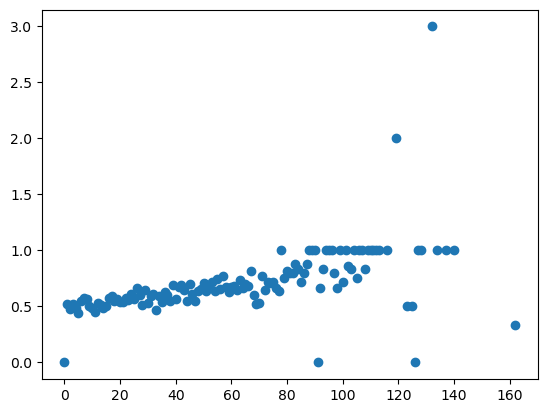

In [81]:
plt.scatter(rank_diff_graph['rpi_diff'], rank_diff_graph['win'])
plt.show()

In [ ]:
"""
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Input: D – Dataset with n data records with m variables, including information of winning W and losing L
D = ...

# Input: V – Set of variables in D
V = ...

# Let V' be the set of k new variables related to V
V_prime = ...

# Let D' be the dataset with variables V'
D_prime = D[V_prime]

# Initialize P to 0
P = 0

# Loop over each variable in V'
for v in V_prime:
    # Calculate the n values D'_v from D
    D_v = D_prime[v]

    # Create a linear regression model
    model = linear_model.LinearRegression()

    # Fit the model to the data
    model.fit(D_v, W)

    # Calculate the probability of winning
    pv = calProbWin(D_v, W, L, model)

    # Add the probability to P
    P += pv

# Divide P by the number of variables in V' to get the average probability
P /= len(V_prime)

# Return the average probability
return P
"""